In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as jr

from _gbm import multi_simulate_gbm

Here is some markdown text

In [13]:
keys = jr.split(jr.key(123), 1000)
sols = multi_simulate_gbm(
    -0.5,
    1.0,
    2.5,
    0.01,
    jnp.array([1.0]),
    keys
)

In [14]:
sols

Solution(
  t0=f32[1000],
  t1=f32[1000],
  ts=f32[1000,251],
  ys=f32[1000,251,1],
  interpolation=None,
  stats={
    'max_steps': weak_i32[1000],
    'num_accepted_steps': weak_i32[1000],
    'num_rejected_steps': weak_i32[1000],
    'num_steps': weak_i32[1000]
  },
  result=EnumerationItem(
    _value=i32[1000], _enumeration=diffrax._solution.RESULTS
  ),
  solver_state=None,
  controller_state=None,
  made_jump=None,
  event_mask=None
)

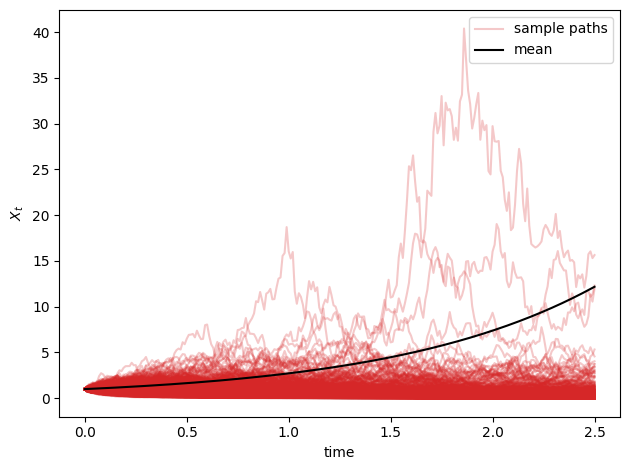

In [15]:
plt.plot(sols.ts[0], sols.ys[0, ..., 0].T, color="tab:red", alpha=0.25, label="sample paths")
plt.plot(sols.ts[0], sols.ys[1:, ..., 0].T, color="tab:red", alpha=0.25)
plt.plot(sols.ts[0], jnp.exp(sols.ts[0]), color="black", label="mean")
plt.xlabel("time")
plt.ylabel(r"$X_t$")
plt.legend()
plt.tight_layout()
plt.show()

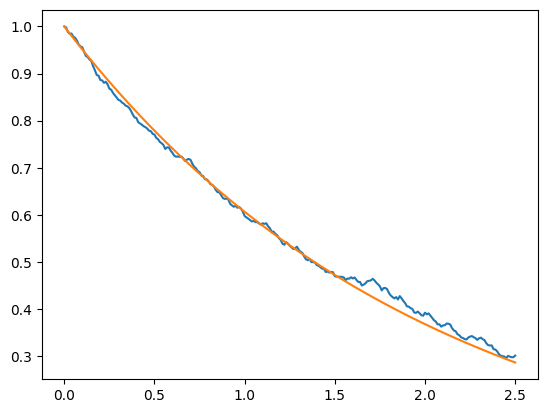

In [17]:
plt.plot(sols.ts[0], jnp.mean(sols.ys[..., 0], axis=0))
plt.plot(sols.ts[0], jnp.exp(-0.5*sols.ts[0]))
plt.show()